In [1]:
 pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
X1 = ctrl.Antecedent(np.arange(0, 1, 0.001), 'Density of healthy cells')
X2 = ctrl.Antecedent(np.arange(0, 1, 0.001), 'Density of cancer cells')
Y = ctrl.Consequent(np.arange(0 , 10, 0.0001), 'Drug dose')

X1['Low'] = fuzz.trapmf(X1.universe, [0, 0, 0.4, 0.7])
X1['Medium'] = fuzz.trimf(X1.universe, [0.4, 0.7, 0.85])
X1['High'] = fuzz.trapmf(X1.universe, [0.7, 0.85, 1, 1])

X2['Low'] = fuzz.trapmf(X2.universe, [0, 0, 0.1, 0.4])
X2['Medium'] = fuzz.trimf(X2.universe, [0.1, 0.4, 0.7])
X2['High'] = fuzz.trapmf(X2.universe, [0.4, 0.6, 1, 1])

Y['Very low'] = fuzz.trapmf(Y.universe, [0, 0, 5.5, 6.5])
Y['Low'] = fuzz.trimf(Y.universe, [5.5, 6, 7])
Y['Medium'] = fuzz.trimf(Y.universe, [6.5, 7, 8])
Y['High'] = fuzz.trimf(Y.universe, [7, 8, 9])
Y['Too high'] = fuzz.trapmf(Y.universe, [8, 9, 10, 10])

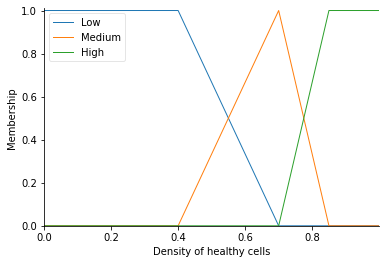

In [4]:
X1.view()

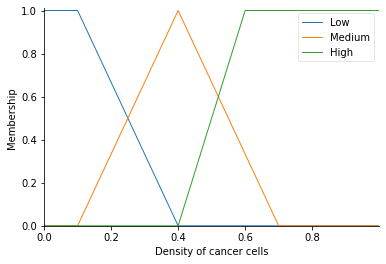

In [5]:
X2.view()

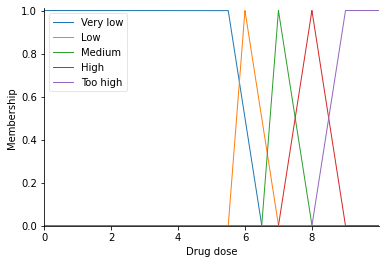

In [6]:
Y.view()

In [7]:
rule1 = ctrl.Rule(X1['Low'] & X2['Low'], Y['Low'])
rule2 = ctrl.Rule(X1['Low'] & X2['Medium'], Y['Medium'])
rule3 = ctrl.Rule(X1['Low'] & X2['High'], Y['Too high'])
rule4 = ctrl.Rule(X1['Medium'] & X2['Low'], Y['Low'])
rule5 = ctrl.Rule(X1['Medium'] & X2['Medium'], Y['Medium'])
rule6 = ctrl.Rule(X1['Medium'] & X2['High'], Y['High'])
rule7 = ctrl.Rule(X1['High'] & X2['Low'], Y['Very low'])
rule8 = ctrl.Rule(X1['High'] & X2['Medium'], Y['Low'])
rule9 = ctrl.Rule(X1['High'] & X2['High'], Y['Medium'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc7a7d2ba90>)

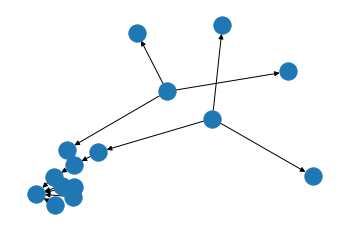

In [8]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc7a4ff4a60>)

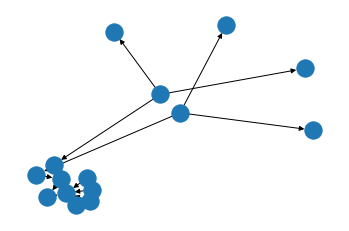

In [9]:
rule9.view()

In [10]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [11]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

7.88256258064589


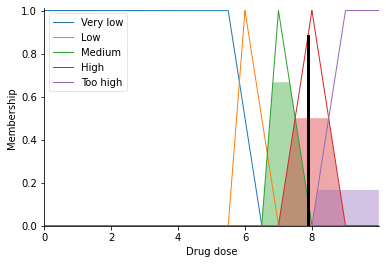

In [12]:
tipping.input['Density of healthy cells'] = 0.65
tipping.input['Density of cancer cells'] = 0.5

tipping.compute()

print(tipping.output['Drug dose'])
Y.view(sim=tipping)

8.694387730871128


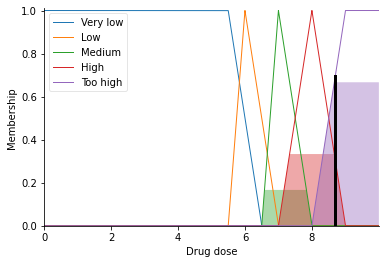

In [13]:
tipping.input['Density of healthy cells'] = 0.5
tipping.input['Density of cancer cells'] = 0.65

tipping.compute()

print(tipping.output['Drug dose'])
Y.view(sim=tipping)